# More with Numpy
In the 2nd part of this book, we will study the numerical methods by using Python. We will use array/matrix a lot later in the book. Therefore, here we are going to introduce the most common way to handle arrays in Python using the [Numpy module](http://www.numpy.org). Numpy is probably the most fundamental numerical computing module in Python. 

NumPy is important in scientific computing, it is coded both in Python and C (for speed). On its website, a few important features for Numpy is listed:

* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

**Scipy** is the complimentary package which we will also use quite a lot. As a rule of thumb, if something is covered in a general textbook on numerical computing, it’s probably implemented in SciPy.

As always, let's start with some imports:

## Array Creation

**Recall** We've already learned a few ways to create arrays. Let's look at some examples:


### Array are better equiped for math than lists

**TRY IT!** Try multiplying our array, z_1d and a list version by the scalar 10. Does 10 distribute to all elements? 

It looks like the list creates 10 copies of the original list. This may be good for some programming tasks but in general the numpy array behaves much more like we would expect from math.

### Lists are not arrays. 
To do numerical computations with their elements we need to call them one by one. 
You need a *for loop* or this: [i*10 for i in x_list] and you will get the same results as with x_numpy * 10. 
We will study *for loops* in more detail next week.


### But *for loops* are slow!

Let's make a larger array and time some calculations on it. We will use time which is called a *magic function*


In [51]:
%%time
a_np = np.arange(1, 2.4e6, 1)   ### note I keep this one small....try pushing it to 1,000,000 and see the
                                        ### difference even more obv 

CPU times: user 6.43 ms, sys: 6.04 ms, total: 12.5 ms
Wall time: 10.9 ms


and a similar new list:


In [53]:
%%time
a_list = list( range( 1, int(2.4e6), 1) )

CPU times: user 47.8 ms, sys: 25.5 ms, total: 73.2 ms
Wall time: 72.6 ms


Now let's replace each number in the array/list with its cube:


Let's replace each element with the square root:

In [56]:
%%time

a_np = np.sqrt(a_np)


CPU times: user 4.3 ms, sys: 1.18 ms, total: 5.47 ms
Wall time: 3.71 ms


In [57]:
%%time

for i in range(len(a_list)): a_list[i] = np.sqrt(a_list[i])


CPU times: user 2.52 s, sys: 6.26 ms, total: 2.53 s
Wall time: 2.53 s


It takes (much) longer to do this with a list than with numpy!

### Practice:

### another example of the power of numpy (and of tricky bugs): 
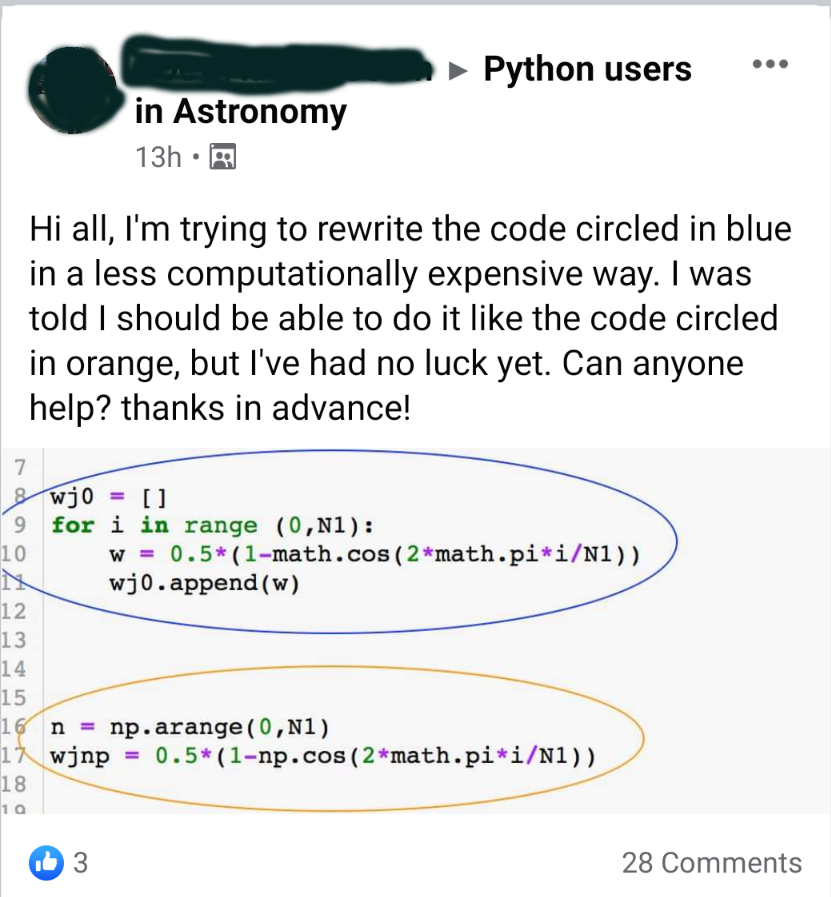


### Creating zero arrays, unit arrays, and incremented arrays.

### How does numpy treat these arrays for the numerical calculations?  

**TRY IT!** make array sum_xy whose elements are the sum of the corresponding elements of x times 2 and y times 3:

Now print the sum of its values:

**TRY IT!** Multiply x by y.

**TRY IT!** Multiply z by y. What happens? Why doesn’t it work?

In [129]:
print(z.shape, y.shape)

(3, 11) (10,)


I wouldn't know how to multiply these things either! What if we use the first 10 columns of $z$?

In [130]:
product = z[:,0:10] * y

It worked thanks to array brodcasting!


In [131]:
print(product)

[[ 0.  6. 12. 18. 24. 30. 36. 42. 48. 54.]
 [ 0.  6. 12. 18. 24. 30. 36. 42. 48. 54.]
 [ 0.  6. 12. 18. 24. 30. 36. 42. 48. 54.]]


Of course, this is NOT matrix multiplication which follows:

$P = ZY : P_{i,j} = \sum_{k = 0}^N{Z_{i, k} \cdot Y_{j, k}}$

or the sum of the products of the elements of Z's row elements by Y's column elements.

We could do that too though:

In [144]:
p = np.matmul(z[:,0:10],y)

print(p)

[270. 270. 270.]


In [146]:
# try this:

a1 = np.array( [ [1, 2] , 
                 [3, 4] ] )
b1 = np.ones( ( 2, 2 ) )

print( a1 )
print( b1 )


[[1 2]
 [3 4]]
[[1. 1.]
 [1. 1.]]


In [147]:
print( a1 * b1 )

[[1. 2.]
 [3. 4.]]


How does “ \* ” work?

“ \* ” does element by element multiplication, NOT matrix multiplication. The different dimensions of your x and z arrays means that * cannot operate as it should. Python gives an error message to warn you that you try something “illegal”. 



**TRY IT!** ...and how about the matrix product of $a_1 \times b_1$?

In [150]:
print ( np.matmul ( a1, b1 ) )

[[3. 3.]
 [7. 7.]]


### Broadcasting
When some conditions are met, Python will allow you to multiply arrays that have different dimensions. The smaller array is broadcast across the larger array so that they have compatible shapes. For example, create an array 


In [151]:
z_2 = np.array( [ 5 ] )

In [152]:
print( z_2.size, type( z_2 ) )

1 <class 'numpy.ndarray'>


**Try it!** add $z_2$ to your array $z$.  Following the strict rules of math this should not work! However, Python allows you to do this using broadcasting:

In [153]:
print( z_2 + z )

[[11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]
 [11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]]


What it does is it ‘creates’ a (3,11) array of 5's and adds it to your array $z$ following the element-by-element rules of matrix addition (same for multiplication etc). 


### More Numpy Functions

#### Practice
Let’s create 3 arrays:
x: goes from 0 to 40 with a step of 0.1
cosx: the cosine of x in radians 
sinx: the sine of x in radians

- Trig. functions always assume radians in Python. 

- You can convert back and forth with np.radians() and np.degrees() or simply multiplying/dividing by $\frac{\pi}{180}$.

In [31]:
x     = np.arange( 0, 40, 0.1)
cosx  = np.cos(x) #x is in radians
sinx  = np.sin(x)

#### Practice

Plot them with cosine in blue and sine in green.

(0.0, 5.0)

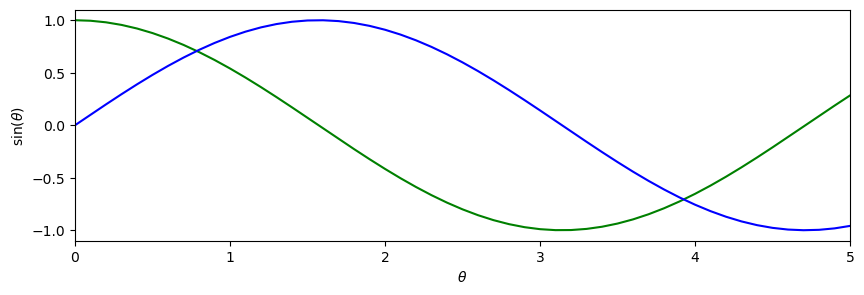

In [13]:
plt.figure( figsize = ( 10, 3 )  )
plt.plot( x, cosx, color= 'green'  ) 
plt.plot( x, sinx, color= 'blue' )
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\sin(\theta)$')
plt.xlim(0,5)

Let's slice out one period:


(0.0, 10.0)

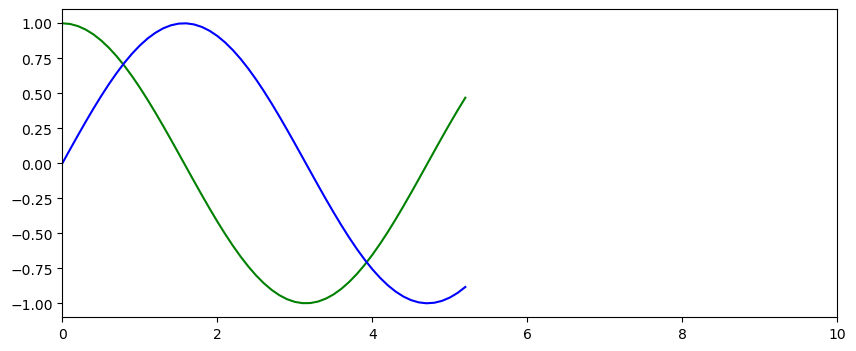

In [17]:
plt.figure( figsize = ( 10, 4 )  )
plt.plot(x[0:53],cosx[0:53] , color= 'green' ) 
plt.plot(x[0:53],sinx[0:53] , color= 'blue')
plt.xlim(0,10)

**WARNING** The plotted arrays must have the same number of elements so if you slice x you must also slice cosx and sinx.

In [159]:
x.shape

(100,)

In [ ]:
#### Let's try the following:

In [ ]:
# print the z first:
print ( z )

In [ ]:
# print z till 10 and z from 2 to 5
print( z [ : 10 ] )
print( z [ 1: 5  ] )

In [ ]:
# print all elements from 6 onwards:

print( z[ 5 :  ] )

In [ ]:
# print z from 12 to 2 with a -2 step; print z from 10 to end with step of 2
print( z [ 11 : 0: -2 ] )
#print( z [  ] )

In [ ]:
z[ 4 ] = 40 
z[ 11: 13] = 42
print( z )

### Boolean and *Masking* Arrays

**Example:** Print all values of cosx that are larger than 0.99:

In [181]:
# how would you do this?
cosx > 0.99

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,

In [183]:
# then:
print( cosx[ cosx>0.99 ] )

[1.         0.99500417 0.9965421  0.99985864 0.99318492 0.99779828
 0.99943459 0.99108487 0.99877236 0.99872797 0.99120281 0.99946405
 0.99773898 0.99328804 0.99987318 0.99646791 0.99509244 0.99999961
 0.99491511]


#### Multiple Conditions: 

In [21]:
z = np.arange(0,30)
print(z)
print(z[(z < 3) | (z >= 10)])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[ 0  1  2 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]


#### If you want to know *where* (which elements of) an array meet a specific criterion use the numpy where statement:


In [28]:
xx =  np.where ( (z < 14) & (z >= 3) ) 
print(x,type(x))
print(x[0][3])

(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),) <class 'tuple'>
6


In [23]:
print( z[ np.where ( z < 14 ) ] )

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


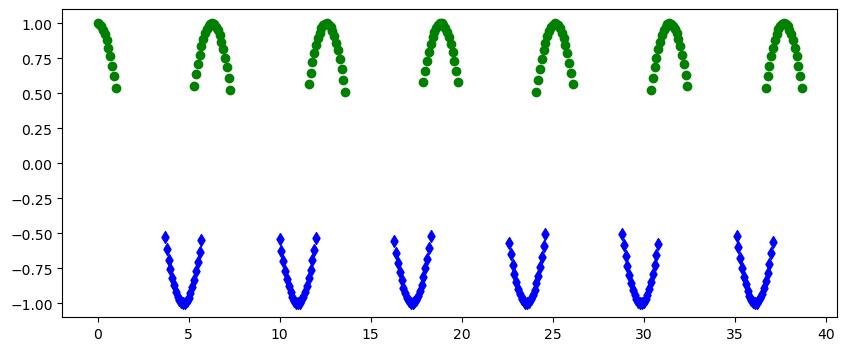

In [32]:
plt.figure( figsize = ( 10, 4 )  )
plt.scatter( x[ cosx > 0.5  ]  , cosx[ cosx > 0.5 ]  , color= 'green', marker = 'o') 
plt.scatter( x[ sinx <= -0.5 ]  , sinx[ sinx <= -0.5]  , color= 'blue', marker = 'd' )

### Masking in 2-dimensions:



In [33]:
tst1 = np.array( [ [ 1, 1, 1 ], [ 2, -2, 2 ], [ -4, -4, 4 ] ] )
tst2 = np.array( [ [ 1, 1, 1 ], [ 2, -2, 2 ], [ -3, 3, 3 ] ] )

In [35]:
print( tst1, '\n\n', tst2 )

[[ 1  1  1]
 [ 2 -2  2]
 [-4 -4  4]] 

 [[ 1  1  1]
 [ 2 -2  2]
 [-3  3  3]]


In [40]:
q_tst1 = np.where( ( tst1 < 0 ) & ( tst2 < 0 ) )  

In [41]:
print( q_tst1 )

(array([1, 2]), array([1, 0]))


In [216]:
np.where( ( tst1 < 0 ) & ( tst2 < 0 ) )

(array([1, 2]), array([1, 0]))

In [217]:
np.where(  tst1 < 0 )

(array([1, 2, 2]), array([1, 0, 1]))

### Practice:

In [42]:
my_2d_array = np.array( [ [ 1  , 2 , 3 , 4 , 5  ], 
                          [ 12 , 15, 16, 22, 18 ], 
                          [ 42 , 54, 53, 67, 88 ] , 
                          [ -41, 36, 98, 10, 12 ]  ] )


In [219]:
print( my_2d_array)

[[  1   2   3   4   5]
 [ 12  15  16  22  18]
 [ 42  54  53  67  88]
 [-41  36  98  10  12]]


**TRY IT!** How do you slice "53" from my_2d_array? 

In [44]:
print(np.where(my_2d_array == 53))
print(my_2d_array[2,2])

(array([2]), array([2]))
53


**TRY IT!** How do you slice "98" from my_2d_array? 

In [45]:
print(my_2d_array[3,2])

98


**TRY IT!** How do you get the slice containing 16, 22, 53, 67?


In [46]:
print(my_2d_array[1:3,2:4])

[[16 22]
 [53 67]]


### Practice:

In [47]:
a = np.array([[0, 1, 2],
              [0, 6, 4],
              [0, 3, 5]])

b = np.transpose(a)

print(a, '\n\n', b)

[[0 1 2]
 [0 6 4]
 [0 3 5]] 

 [[0 0 0]
 [1 6 3]
 [2 4 5]]


**TRY IT!** How do you get the slice containing the values of $a$ that are greater than 2?

In [49]:
locations = np.where(a > 2)
print(a[locations],locations)

[6 4 3 5] (array([1, 1, 2, 2]), array([1, 2, 1, 2]))


**TRY IT!** Get the values of $b$ that are in the places where $a$ is greater than 2.

In [50]:
print(b[locations])

[6 3 4 5]


### Practice:
Multiply $a$ by 2, subtract 100 from $b$ and sum the results. Assign the answer to the variable $c$. 

In [55]:
c = a*2 + (b - 100)


In [56]:
print(c)

[[-100  -98  -96]
 [ -99  -82  -89]
 [ -98  -90  -85]]


Calculate and print the min of $c$, its max, and its mean:

In [57]:
print(np.min(c),np.max(c),np.mean(c))

-100 -82 -93.0


Print the mean of the base 10 logarithm of absolute value of $c$.

In [59]:
print(np.mean(np.log10(np.abs(c))))

1.9674693192449284


### Reading Data with Numpy.

One of the great features of numpy is that it also allows you to read data in an array in a single command. You do that with np.loadtxt( "name_of_file" ) [see also: https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html ] or np.genfromtxt("name_of_file") [see also: https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html ]. 

**TRY IT!** Find the file *my_first_data.dat*. It should already be in your file folder. Open it with a text editor to see what it looks like. 
- Read it in an array *all_input_data* with loadtxt or genfromtxt. 
- Check what your array looks like (print it). 
- Print all times each car traveled. 
- Assuming each car travelled at it's top speed (constant), print all distances the cars traveled. 
- Calculate the distance each car traveled **in a single line** and asign it to array *distances_traveled*. 
- Print *distances_traveled*

In [66]:
all_input_data = np.loadtxt( 'my_first_data.dat')

In [65]:
print(time)

[5.2 3.1 2.4 5.1 2.4]


In [67]:
print( all_input_data )

[[  1.    5.2 120.2]
 [  2.    3.1 110. ]
 [  3.    2.4 100.5]
 [  4.    5.1  65.3]
 [  5.    2.4 119.6]]


In [257]:
print( all_input_data[ :, 1 ] )

[5.2 3.1 2.4 5.1 2.4]


In [68]:
distance_traveled =  all_input_data[ :, 1 ] * all_input_data[ :, 2 ] 

In [69]:
print( distance_traveled )

[625.04 341.   241.2  333.03 287.04]


### Now let's try genfromtxt with different data: 

**TRY IT!** Find the file *test_genfromtxt.dat*. It should also already be in your file folder. Open it with a text editor to see what it looks like. 
- Read data into variable student_data. 
- Print the IDs of the students. 
- Print the average quiz  grade for student 202204. 
- Print the average quiz grade and the IDs of all students that passed the class with a C- or better ( average total of more than 7.0).

In [70]:
student_data = np.genfromtxt( 'test_genfromtxt.dat' )

In [71]:
print( student_data )

[[2.02201e+05 8.10000e+00 8.40000e+00 8.20000e+00]
 [2.02202e+05 7.50000e+00 7.00000e+00 7.30000e+00]
 [2.02203e+05 7.90000e+00 8.50000e+00 8.40000e+00]
 [2.02204e+05 9.50000e+00 9.70000e+00 9.70000e+00]
 [2.02205e+05 5.30000e+00 6.00000e+00 5.90000e+00]
 [2.02206e+05 5.10000e+00 7.10000e+00 6.80000e+00]]


In [262]:
#Student ID  Average-Grade-Quiz  Average-Grade-Exam    Average-Total

In [263]:
IDs = student_data[ :, 0 ]
print( IDs )

[202201. 202202. 202203. 202204. 202205. 202206.]


In [264]:
print( student_data[ 3, 1 ])

9.5


In [265]:
student_data[ :, 3 ] > 7 

array([ True,  True,  True,  True, False, False])

In [266]:
print( student_data )

[[2.02201e+05 8.10000e+00 8.40000e+00 8.20000e+00]
 [2.02202e+05 7.50000e+00 7.00000e+00 7.30000e+00]
 [2.02203e+05 7.90000e+00 8.50000e+00 8.40000e+00]
 [2.02204e+05 9.50000e+00 9.70000e+00 9.70000e+00]
 [2.02205e+05 5.30000e+00 6.00000e+00 5.90000e+00]
 [2.02206e+05 5.10000e+00 7.10000e+00 6.80000e+00]]


In [267]:
np.where( student_data[ :, 3 ] > 7  )

(array([0, 1, 2, 3]),)

In [268]:
print( student_data[ np.where( student_data[ :, 3 ] > 7  ) , 1 ])

[[8.1 7.5 7.9 9.5]]


In [269]:
print( student_data[ np.where( student_data[ :, 3 ] > 7  ) , 0 ])

[[202201. 202202. 202203. 202204.]]


In [270]:
print( student_data[  student_data[ :, 3 ] > 7  , 1 ])

[8.1 7.5 7.9 9.5]


The follow text looks like output: `"Hello world"`

### Practice:
- Create a function that calculates the y-component of the velocity for projectiles on Earth and neglecting air resistance.

  Assume the inputs are arrays: `y_0` (initial heights) and `v_0y` (the y-component of the initial velocity) 
  from a height h. Use the kinematic equation:

  $v_f^2 = v_0^2 + 2 a_y \Delta y$,

  where $a_y = -g = -9.8 \mathrm{\frac{m}{s^2}}$ and all quantities are in SI units.

- Call your function for 10 objects with heights ranging from 0 - 10 m (including 10 m) and 10 velocities ranging from 5 m/s – -5 m/s (reverse order)



In [78]:
def v_final_y(y_0,v_0y):
    """
    Calculates the y-component of an object (or objects) final velocity (velocities) at y_f = 0 m.
    Input: 
    initial height(s) [array]
    initial velocity y-component [array]
    Output:
    final velocity y-component [array]
    """
    y_f = 0 #ends at ground level
    
    delta_y = y_f - y_0 #y displacement
    
    v_f = np.sqrt(v_0y**2 - 2*9.8*delta_y)

    return v_f



In [77]:
y_0 = np.arange(0,11,1)
v_0y = np.arange(5,-6,-1)
print(y_0,v_0y)

print(v_final_y(y_0,v_0y))

[ 0  1  2  3  4  5  6  7  8  9 10] [ 5  4  3  2  1  0 -1 -2 -3 -4 -5]
[ 2.23606798  4.85798312  6.49615271  7.79743548  8.91066776  9.89949494
 10.79814799 11.62755348 12.4016128  13.13011805 13.82027496]


### Practice:

- Create a function `c_mass` that calculates the 3D vector to the center of mass. The input should be a 1D array of $n$ masses   and a $3 \times n$ array of x, y, z coordinates for each mass (so each column is the coordinates of a single mass). Use the following equation:

  $\vec{r}_{cm} = \sum_{i = 0}^N{\frac{m_i\vec{r}_i}{m_i}}$

- call the function for 4 masses:

  - $m_1 = 23$ kg at $\vec{r}_1 = 3\hat{i} +  3\hat{j} + 3\hat{k}$
  - $m_2 = 3$ kg at $\vec{r}_2 = 0\hat{i} +  0\hat{j} + 8\hat{k}$
  - $m_3 = 8$ kg at $\vec{r}_3 = -1\hat{i} + 1\hat{j} + -4\hat{k}$
  - $m_4 = 2$ kg at $\vec{r}_4 = 0\hat{i} + 0\hat{j} + 0\hat{k}$

  and determine the vector from the origin to the center of mass.

In [93]:
def c_mass(masses,position_vectors):
    """Blah blah my informative doc string...take in 3 x n array blah"""
    
    mass_weighted_positions = masses*position_vectors
    total_mass = np.sum(masses)
    center_of_mass = np.sum(mass_weighted_positions,1)/total_mass
    return center_of_mass
    

In [94]:
masses = np.array([23,3,8,2]) #kg
positions = np.transpose(np.array([[3,3,3],[0,0,8],[-1,1,-4],[0,0,0]]))

print(masses,'\n\n',positions,np.shape(masses),np.shape(positions))

[23  3  8  2] 

 [[ 3  0 -1  0]
 [ 3  0  1  0]
 [ 3  8 -4  0]] (4,) (3, 4)


In [95]:
mass_weighted_positions = masses*positions
print(mass_weighted_positions)

[[ 69   0  -8   0]
 [ 69   0   8   0]
 [ 69  24 -32   0]]


In [96]:
total_mass = np.sum(masses)
print(total_mass)
center_of_mass = np.sum(mass_weighted_positions,1)/total_mass
print(center_of_mass,np.shape(center_of_mass))

36
[1.69444444 2.13888889 1.69444444] (3,)


In [97]:
print(c_mass(masses,positions))

[1.69444444 2.13888889 1.69444444]


In [98]:
print(positions,positions.T)

[[ 3  0 -1  0]
 [ 3  0  1  0]
 [ 3  8 -4  0]] [[ 3  3  3]
 [ 0  0  8]
 [-1  1 -4]
 [ 0  0  0]]


###  Practice:
Create a list student_h that contains lists with the heights of students in feet and inches. A person being 5' 6" would be noted as [5, 6], a person being 5' 10" would be noted as [5, 10]. Populate it with the heights of five students who are : 5’ 1”, 4’ 10”, 6’ 02”, 5’ 07”, and 6’ 11”. Create a function ft_to_m_cm that takes as input a value from student_h and returns each height in a new list [m, cm] (round cm up). Call the function for all values of student_h and print the results with an informative sentence (e.g., Student 1 has a height of 1 m 10 cm )  (Remember that 1 ft ~= 0.3048 m and 1 inch ~= 0.0254 m and 1m has 100cm). 

- Discuss: what should the function's input be? 
- What should its output be?
- What does the function need to calculate? How will it do that?
- Code it up!

In [ ]:
#make student_h list:

In [ ]:
#make your function:


In [ ]:
#calculate the heights in m and cm and print with informative statement: